In [35]:
#import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
import psycopg2

In [3]:
# Create Connection
conn = psycopg2.connect(database="postgres", user="postgres", password="admin", host="127.0.0.1", port="5432")
print("Database opened successfully")

Database opened successfully


In [4]:
# Create a cursor object
cur = conn.cursor()

In [5]:
# A sample query of all data from the "homeless_edu" table in the "posgres" database 
cur.execute("""SELECT * FROM homeless_edu""")
homeless_edu = cur.fetchall()
print(homeless_edu)

[('2007_AL             ', 7069040, 7196459, 216941, 742919, '2007', 'AL', 8075, 3822, 11897), ('2007_AK             ', 1800616, 1938755, 42049, 131029, '2007', 'AK', 2995, 567, 3562), ('2007_AZ             ', 8724434, 8709531, 316376, 1087447, '2007', 'AZ', 17886, 14210, 32096), ('2007_AR             ', 4415981, 4779308, 138921, 479016, '2007', 'AR', 4979, 3545, 8524), ('2007_CA             ', 72516936, 73225422, 2011865, 6343471, '2007', 'CA', 102972, 215341, 318313), ('2007_CO             ', 7689014, 8039146, 236141, 801867, '2007', 'CO', 14346, 16154, 30500), ('2007_CT             ', 8913149, 8685421, 176592, 570626, '2007', 'CT', 7938, 2049, 9987), ('2007_DE             ', 1694929, 1705204, 37555, 122574, '2007', 'DE', 1784, 488, 2272), ('2007_DC             ', 1148358, 1140506, 20242, 78422, '2007', 'DC', 11399, 1001, 12400), ('2007_FL             ', 28898362, 29849892, 810952, 2666811, '2007', 'FL', 42900, 60701, 103601), ('2007_GA             ', 17755989, 17389530, 471012, 16495

In [14]:
# Create DataFrame
df = pd.DataFrame(homeless_edu, columns=["State_Year", 'TOTAL_REVENUE','TOTAL_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G', "Homeless_Count"])

#drop columns
df = df.drop(columns=['State'])
df.head()

,Year,TOTAL_REVENUE,TOTAL_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,Homeless_Count
0,2007,1800616,1938755,1679,9625,9420,9953,10092,77676,42049,131029,7124
1,2007,7069040,7196459,3592,55972,57795,58792,46200,466414,216941,742919,23794
2,2007,4415981,4779308,12795,38192,35710,35944,30708,288518,138921,479016,17048
3,2007,8724434,8709531,15854,86742,82876,81196,76275,668290,316376,1087447,64192
4,2007,72516936,73225422,68002,454743,467305,490054,468281,3801685,2011865,6343471,636626


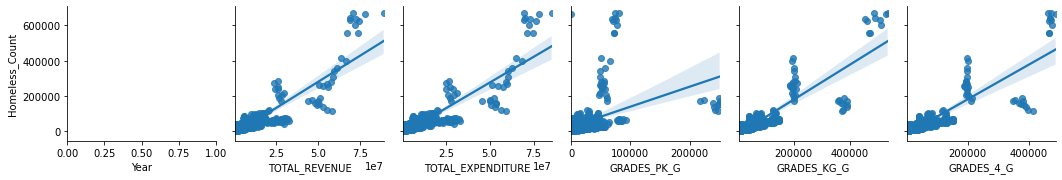

In [15]:
#see what variables have relationship with homeless count
sns.pairplot(df, x_vars=['Year','TOTAL_REVENUE','TOTAL_EXPENDITURE','GRADES_PK_G','GRADES_KG_G','GRADES_4_G'],y_vars='Homeless_Count',kind='reg')

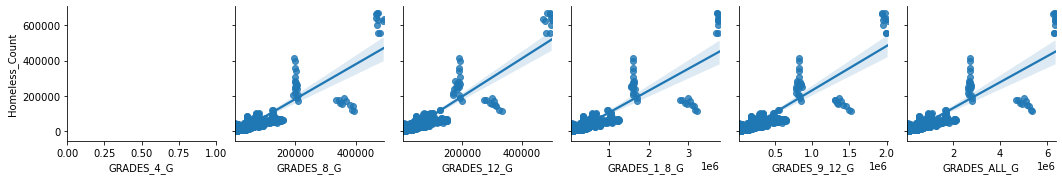

In [42]:
#see what variables have relationship with homeless count
sns.pairplot(df, x_vars=['GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G'],y_vars='Homeless_Count',kind='reg')

In [17]:
#create features 
X = df.drop(columns=['Homeless_Count'])
y = df['Homeless_Count']

In [18]:
#split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
#create encoder instance
scaler = StandardScaler()

In [20]:
#fit the scaler
X_scaler = scaler.fit(X_train)

In [21]:
#transform data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
#instantiate model
model = linear_model.LinearRegression()

In [23]:
#fit model
model.fit(X_train_scaled,y_train)

LinearRegression()

In [24]:
#generate predictions
y_pred = model.predict(X_test_scaled)

In [25]:
print(y_pred)

[ 2.22133820e+01  4.32654430e+04 -3.63684888e+02  2.71384500e+04
  5.75513028e+05  6.97103270e+04  8.56391916e+03  2.50615043e+03
  1.56802960e+05  1.80303996e+05  4.14581581e+04  2.27603701e+04
  7.26195026e+04  5.26568569e+04  4.39779943e+04  3.24531273e+04
  5.69656470e+04  4.64971854e+03  2.12014162e+04  8.59943570e+03
  6.09650332e+05  3.03204794e+04  2.86432747e+05  2.03587613e+04
  3.47644761e+04 -7.86033299e+03  8.75118923e+04  2.13398519e+03
  1.38061328e+05  1.99512677e+05  3.02331086e+04  1.61801375e+05
  1.02727061e+04  5.30082665e+04  8.36725364e+04 -6.56091091e+03
  6.02435164e+04  6.80452871e+04  6.60442032e+03  5.65785231e+04
  6.92848523e+03  7.70105459e+04  4.36700005e+03  7.55025007e+04
  5.82835094e+03  9.10885268e+04  3.46554627e+04  9.69541162e+04
  2.44931145e+04  5.40535881e+04  1.79957139e+04  7.06823729e+04
  1.82994617e+04  2.76510810e+04  2.18107659e+04  2.19763874e+04
  2.93738913e+04  4.01781043e+03  6.96218380e+04  1.97590765e+04
  6.78434377e+04  1.54371

In [26]:
#get r2 value to determine if model is good fit
metrics.r2_score(y_test, y_pred)

0.9321643153292163

In [27]:
#print result of MAE (mean absolute error)
print(metrics.mean_absolute_error(y_test,y_pred))

20304.47839169219


In [40]:
#print result of MSE (mean squared error)
print(metrics.mean_squared_error(y_test,y_pred))

995095019.373112


In [41]:
#print result of RMSE (root mean squared error)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

31545.1267135371
